In [2]:
import numpy as np
from itertools import combinations, product, combinations_with_replacement
from matplotlib import pyplot as plt

In [13]:
p = 6
total_num = (p**2+p)//2
pairs = combinations_with_replacement(range(p), 2)
parralellograms_all = [{pair1, pair2} for pair1, pair2 in combinations(pairs, 2) if sum(pair1) == sum(pair2)]
parralellograms_matrix = []

In [14]:
def random_split_index(total_num, train_frac=0.8):
    train_num = int(total_num*train_frac)
    train_indecies = sorted(np.random.choice(total_num, train_num, replace=False))
    test_indecies = sorted(list(set(np.arange(total_num)) - set(train_indecies)))
    return train_indecies, test_indecies

to_tuple = lambda x: map(tuple, x)
def get_paralellograms(x): 
    return [(pair1, pair2) for pair1, pair2 in combinations(to_tuple(x), 2) if sum(pair1) == sum(pair2)]

np.random.seed(0)  
train_id, test_id = random_split_index(total_num, 0.5)
pairs = np.array(list(combinations_with_replacement(range(p), 2)))
parralellograms_all = get_paralellograms(pairs)
parralellograms_train = get_paralellograms(to_tuple(pairs[train_id]))
parralellograms_test = get_paralellograms(to_tuple(pairs[test_id]))

In [15]:
print(parralellograms_train)
print(parralellograms_test)
print(parralellograms_all)

[((1, 3), (2, 2)), ((1, 5), (2, 4))]
[((0, 3), (1, 2)), ((0, 5), (1, 4)), ((0, 5), (2, 3)), ((1, 4), (2, 3))]
[((0, 2), (1, 1)), ((0, 3), (1, 2)), ((0, 4), (1, 3)), ((0, 4), (2, 2)), ((0, 5), (1, 4)), ((0, 5), (2, 3)), ((1, 3), (2, 2)), ((1, 4), (2, 3)), ((1, 5), (2, 4)), ((1, 5), (3, 3)), ((2, 4), (3, 3)), ((2, 5), (3, 4)), ((3, 5), (4, 4))]


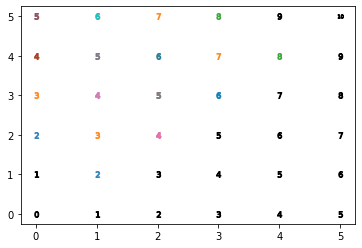

In [16]:
mat = [[i+j for i in range(p)] for j in range(p)]
for i, (pair1, pair2) in enumerate(parralellograms_all):
    mat[pair1[0]][pair1[1]] = -1
    mat[pair2[0]][pair2[1]] = -1
    plt.scatter(*pair1, marker=f"${sum(pair1)}$", color=f'C{i}', alpha=0.8)
    plt.scatter(*pair2, marker=f"${sum(pair2)}$", color=f'C{i}', alpha=0.8)
for row, col in product(range(p), range(p)):
    if mat[row][col] != -1:
        plt.scatter(row, col, marker=f"${row+col}$", color='black')
plt.show()

In [17]:
parralellograms_matrix = set()
parralellograms_matrix_train = set()
def get_row(eqn):
    row = np.zeros(p)
    (i, j), (k, l) = eqn
    row[i] += 1
    row[j] += 1
    row[k] -= 1
    row[l] -= 1
    return tuple(row.tolist())

for eqn in parralellograms_all:
    row = get_row(eqn)
    parralellograms_matrix.add(row)
    if eqn in parralellograms_train:
        parralellograms_matrix_train.add(row)


def augment_matrix(matrix):
    _rank = lambda x: np.linalg.matrix_rank(np.array(list(x)))
    new_matrix = matrix.copy()
    for row in parralellograms_matrix:
        if row in matrix:
            continue
        tmp = new_matrix.copy()
        tmp.add(row)
        if _rank(new_matrix) == _rank(tmp):
            new_matrix.add(row)
    return new_matrix

In [18]:
print(parralellograms_matrix)
print(parralellograms_matrix_train)
print(augment_matrix(parralellograms_matrix_train))

{(0.0, 1.0, -2.0, 1.0, 0.0, 0.0), (0.0, 1.0, -1.0, -1.0, 1.0, 0.0), (0.0, 0.0, 1.0, -1.0, -1.0, 1.0), (0.0, 1.0, -1.0, 0.0, -1.0, 1.0), (0.0, 1.0, 0.0, -2.0, 0.0, 1.0), (0.0, 0.0, 0.0, 1.0, -2.0, 1.0), (1.0, -1.0, 0.0, -1.0, 1.0, 0.0), (1.0, -1.0, -1.0, 1.0, 0.0, 0.0), (1.0, 0.0, -1.0, -1.0, 0.0, 1.0), (1.0, 0.0, -2.0, 0.0, 1.0, 0.0), (0.0, 0.0, 1.0, -2.0, 1.0, 0.0), (1.0, -2.0, 1.0, 0.0, 0.0, 0.0), (1.0, -1.0, 0.0, 0.0, -1.0, 1.0)}
{(0.0, 1.0, -2.0, 1.0, 0.0, 0.0), (0.0, 1.0, -1.0, 0.0, -1.0, 1.0)}
{(0.0, 1.0, -2.0, 1.0, 0.0, 0.0), (0.0, 0.0, 1.0, -1.0, -1.0, 1.0), (0.0, 1.0, -1.0, 0.0, -1.0, 1.0)}


In [20]:
pairs[test_id]

array([[0, 0],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [1, 2],
       [1, 4],
       [2, 3],
       [3, 3],
       [3, 4],
       [3, 5]])

In [21]:
pairs[train_id]

array([[0, 1],
       [1, 1],
       [1, 3],
       [1, 5],
       [2, 2],
       [2, 4],
       [2, 5],
       [4, 4],
       [4, 5],
       [5, 5]])

In [30]:
# Get parallelograms 
parralellograms_matrix_train_augmented = augment_matrix(parralellograms_matrix_train)
for pair in pairs[test_id]:
    for parallelogram in parralellograms_all:
        if tuple(pair) in parallelogram:
            if get_row(parallelogram) in parralellograms_matrix_train_augmented:
                print(f"{pair} is in {parallelogram}")

[3 4] is in ((2, 5), (3, 4))
